In [1]:
import yfinance as yf
tecl= yf.Ticker("tecl")
opt = tecl.option_chain('2021-03-19')
calls_t= opt.calls
test = calls_t.iloc[0]
test1 = calls_t.loc[calls_t['strike']==305]
test_bid = float(test['bid'])
test1_bid = float(test1['bid'])
net_credit = test_bid + test1_bid
#net_credit

In [2]:
tecl.history(period = "5d")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-22,439.609985,443.660004,425.320007,426.440002,304100,0,0
2021-02-23,406.190002,429.820007,383.790009,422.660004,468200,0,0
2021-02-24,413.660004,442.739990,403.549988,442.079987,261700,0,0
2021-02-25,429.880005,438.119995,390.000000,396.010010,390800,0,0
2021-02-26,407.100006,419.510010,390.880005,402.390015,299300,0,0


In [145]:
import yfinance as yf
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

def rvol(rvol_days,amp,sec,mty):
    global rvol_px
    tecl= yf.Ticker(sec) #get ticker
    period = tecl.history(period = str(rvol_days) + "d") #get realized vol
    rvol_px = period['Close'].std()*math.sqrt(270/rvol_days)/100 #get price adjustment based on realized vol
    opt = tecl.option_chain(mty) #get the opition chain
    calls = opt.calls # get the calls
    puts = opt.puts # get the puts
    calls_vol_buy = calls[calls['impliedVolatility']<rvol_px] # assign all the calls to buy
    puts_vol_buy = puts[puts['impliedVolatility']<rvol_px] # assign all the puts to buy
    calls_vol_sell = calls[calls['impliedVolatility']>rvol_px] # assign only the calls that have ivols > rvols
    puts_vol_sell = puts[puts['impliedVolatility']>rvol_px] # assign only the puts that have ivols > rvols
    px = np.round(tecl.info['previousClose'],-1) # get spot px
    
    #determine whether the premium value is null or not
    if not calls_vol_sell[calls_vol_sell['strike']== np.round(px*(1+amp),-1)].empty : 
        #calls_sell= calls_vol_sell[calls_vol_sell['strike']== np.round(px*(1+amp),-1)]['bid']
        calls_sell= float((calls_vol_sell[calls_vol_sell['strike']== np.round(px*(1+amp),-1)]['bid']+\
        calls_vol_sell[calls_vol_sell['strike']== np.round(px*(1+amp),-1)]['ask'])/2)
    else: 
        #calls_sell= opt.calls.iloc[0]
        calls_sell = 0
            
    if not calls_vol_buy[calls_vol_buy['strike']== np.round((px*(1+amp))+50,-1)].empty : 
        #calls_buy= calls_vol_buy[calls_vol_buy['strike']== np.round((px*(1+amp))+50,-1)]['ask']
        calls_buy= float((calls_vol_buy[calls_vol_buy['strike']== np.round((px*(1+amp))+50,-1)]['ask']+\
        calls_vol_buy[calls_vol_buy['strike']== np.round((px*(1+amp))+50,-1)]['bid'])/2)
    else: 
        #calls_buy=opt.calls.iloc[0]
        calls_buy=0
        
    if not puts_vol_sell[puts_vol_sell['strike']== np.round(px*(1-amp),-1)].empty : 
        #puts_sell= puts_vol_sell[puts_vol_sell['strike']== np.round(px*(1-amp),-1)]['bid']
        puts_sell= float((puts_vol_sell[puts_vol_sell['strike']== np.round(px*(1-amp),-1)]['bid']+\
        puts_vol_sell[puts_vol_sell['strike']== np.round(px*(1-amp),-1)]['ask'])/2)
    else: 
        #puts_sell=opt.puts.iloc[0]
        puts_sell=0
        
    if not puts_vol_buy[puts_vol_buy['strike']== np.round(px*(1-amp)-50,-1)].empty : 
        #puts_buy= puts_vol_buy[puts_vol_buy['strike']== np.round(px*(1-amp)-50,-1)]['ask']
        puts_buy= float((puts_vol_buy[puts_vol_buy['strike']== np.round(px*(1-amp)-50,-1)]['ask']+\
        puts_vol_buy[puts_vol_buy['strike']== np.round(px*(1-amp)-50,-1)]['bid'])/2)
    else: 
        #puts_buy=opt.puts.iloc[0]
        puts_buy=0
    
    global opt_vol_buy, opt_vol_sell
    opt_vol_buy = calls_vol_buy.append(puts_vol_buy)
    opt_vol_sell = calls_vol_sell.append(puts_vol_sell)
    opt_vol = opt_vol_buy.append(opt_vol_sell)
    #iron = calls_sell.append(calls_buy).append(puts_sell).append(puts_buy)
    
    net_credit = float(calls_sell) + float(puts_sell) - float(calls_buy) - float(puts_buy)
    
    print('calls_sell = {}\ncalls_buy = {}\nputs_sell = {}\nputs_buy = {}\nNet Credit = {}'.format(float(calls_sell),\
    float(calls_buy),float(puts_sell),float(puts_buy),net_credit))
    
    mp.scatter(opt_vol['strike'], 
            opt_vol['impliedVolatility'])
    mp.gcf().set_size_inches(11,8)

calls_sell = 0.0
calls_buy = 2.4
puts_sell = 8.4
puts_buy = 0.0
Net Credit = 6.0


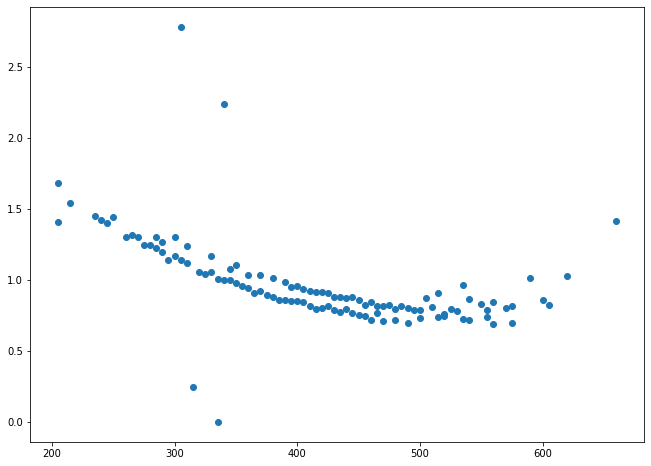

In [146]:
rvol(30,0.20,'tecl',"2021-03-19")

In [147]:
rvol_px

0.8459412621873327